# CATS and DOGS
## Image Classification - CNN

In [69]:
# !pip install opencv-python

In [70]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [71]:
import matplotlib.pyplot as plt
import cv2 # openCV

In [72]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [73]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

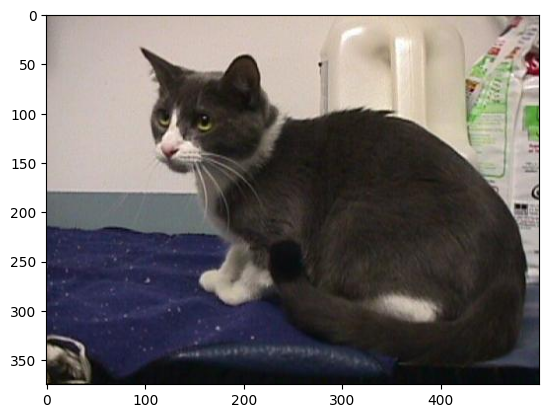

In [74]:
plt.imshow(cat4)

In [75]:
cat4.shape

(375, 500, 3)

In [76]:
dog2 = cv2.imread('CATS_DOGS/train/Dog/2.jpg')

In [77]:
dog2.shape

(199, 188, 3)

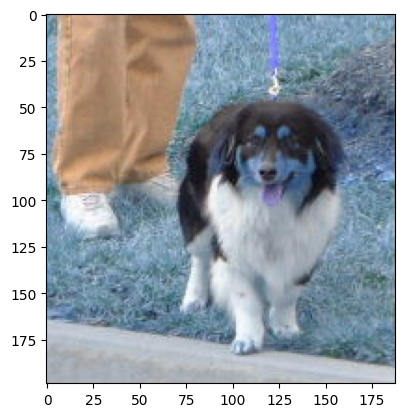

In [78]:
plt.imshow(dog2)

# Image Manipulation

In [79]:
from keras.preprocessing.image import ImageDataGenerator

In [80]:
image_gen= ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.15,
                             rescale=1/255,
                             shear_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

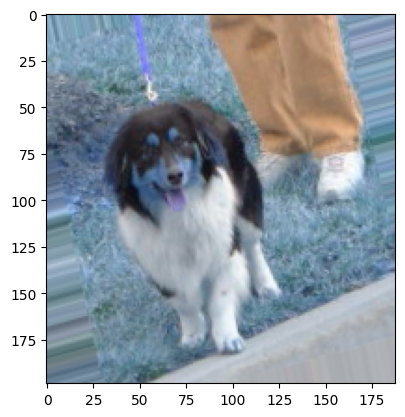

In [81]:
plt.imshow(image_gen.random_transform(dog2))

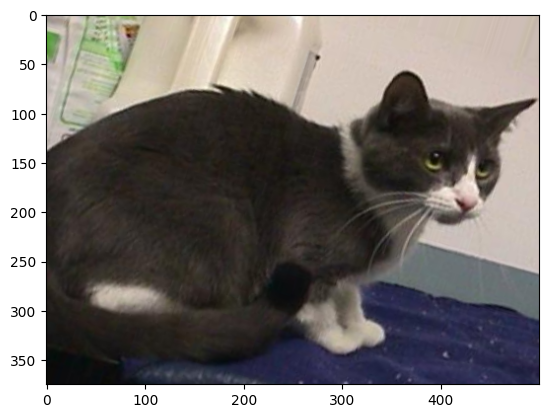

In [82]:
plt.imshow(image_gen.random_transform(cat4))

In [83]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 14231 images belonging to 2 classes.


In [84]:
image_gen.flow_from_directory('CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [85]:
image_shape = (150, 150, 3)

In [86]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [87]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

Dropout is not needed much after Convolutional layers. We'll use it after the Dense layer because the model will be heavy over there.

We flatten the model because we have to feed it to the fully connected layer.

We want a generally bigger neural network but we don't want to rely on a particular neuron so we randomly switch off neurons so that we can utilize the full neural network architechture. These neurons are randomly switched off on every epoch.

In [88]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [90]:
batch = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                                target_size=(150, 150),
                                                batch_size=batch,
                                                class_mode='binary')

Found 14231 images belonging to 2 classes.


We give our data to the model in the form of batches. Keep it 16, 20, may be 50 so that your model does not become heavy on one epoch.

In [91]:
batch = 16
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                                target_size=(150, 150),
                                                batch_size=batch,
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


The smaller the batch size, the less the computation; the greater the batch size, the more the computation so each iteration will take more time to train.

We make directories because of the memory issue so that we can directly get the images from the computer hard drive. 

Directory is basically calling the data from those folders we have created. 

In [92]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [93]:
# Train the model
results = model.fit_generator(train_image_gen, epochs=1,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                              validation_steps=12)

150/150 [==============================] - 47s 282ms/step - loss: 0.6656 - accuracy: 0.6538 - val_loss: 0.7218 - val_accuracy: 0.4583


In [94]:
# Train the model
results = model.fit_generator(train_image_gen, epochs=1,
                              validation_data=test_image_gen,
                              validation_steps=12)

890/890 [==============================] - 266s 296ms/step - loss: 0.6297 - accuracy: 0.6627 - val_loss: 0.6465 - val_accuracy: 0.6042


In [95]:
results.history['accuracy']

[0.6627081632614136]

In [96]:
from keras.models import load_model

In [97]:
new_model = load_model('cat_dog_100epochs.h5')

In [98]:
dog_file = 'CATS_DOGS/test/Dog/9914.jpg'

In [99]:
from keras.preprocessing import image

# load the image through keras to define its target size
dog_img = image.load_img(dog_file, target_size=(150, 150))

In [100]:
dog_file = image.img_to_array(dog_img)

In [101]:
dog_file.shape

(150, 150, 3)

In [102]:
import numpy as np

# call this function only once, otherwise this will keep on adding dimensions
dog_img = np.expand_dims(dog_file, axis=0)

In [103]:
dog_img.shape

(1, 150, 150, 3)

In [104]:
# normalize the image
dog_img = dog_img/255

In [105]:
prediction_prob = new_model.predict(dog_img)

1/1 [==============================] - 4s 4s/step


In [106]:
print(prediction_prob)

[[0.7321687]]


In [107]:
predictions = new_model.predict(dog_img)
predicted_classes = np.argmax(predictions, axis=1)

1/1 [==============================] - 3s 3s/step


In [108]:
print(predicted_classes)

[0]


In [109]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess your test image (adjust the path accordingly)
img_path = 'CATS_DOGS/test/DOG/9914.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Use model to make predictions
predictions = new_model.predict(img)

# Apply a threshold (e.g., 0.5) to get the predicted class label
predicted_class = (predictions > 0.5).astype(int)[0][0]

# Print the predicted class label (0 for cat, 1 for dog)
if predicted_class == 0:
    print("Predicted class: Cat")
else:
    print("Predicted class: Dog")

1/1 [==============================] - 2s 2s/step
Predicted class: Dog


### **Notes**
* In transfer learning, different types of architectures prefer different input shapes. We try to keep the image shape smaller to reduce computation complexity. We also don't want that the model learns noise in the image.
* Rescaling means that we max pool the nearest pixels of an image.
* We use ImageDataGenerator library because we can't upload the whole data on our notebook. We also use it to generate some new images through data augmentation. This is done to random images. Rescale in ImageDataGenerator() is normalization.
* We use flow_from_directory() function which makes a pipeline to tell the computer from where to pick the data and feed into the model.
* When working with custom data, folder structure is very important. We arrange our data in a specific way instead of train test split. This makes our algorithm very robust.
* In production, you can start from 50 epochs, even 100.
* `batch_size` and `steps_per_epoch` can be increased.
* For training, the model will randomly pick 2400(16*150[batch_size * steps_per_epoch]) images. (150 batches per epoch) This is generally done so that the model doesn't overfit because the model learns at every epoch. This parameter is determined by your computational capability and the time that you have. It doesn't much affect the accuracy or loss. It's a lower priority hyperparameter.
* For validation, the model will check 192(16*12) images.
* We use fit_generator() to train the model for custom data.
* To reduce bias, we train longer.
* You need to convert your image to an array because your neural network understands arrays easily.
* np.expand_dims() - You give your neural network the number of images (inferences) that you are putting into, that's why we use this function.
* Neural network output layer gives us the probability.

## Transfer Learning

##### VGG16

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define directories for train and test data
train_dir = 'CATS_DOGS/train'
test_dir = 'CATS_DOGS/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 16

# Create data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory('CATS_DOGS/test',
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new sequential model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Flatten the output of the VGG16 base model
model.add(Flatten())

# Add custom top layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

### **Available Model Architectures**

##### VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
model = VGG19(weights='imagenet'), include_top=False, input_shape=(224, 224, 3)

##### ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet'), include_top=False, input_shape=(224, 224, 3)

##### InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3
model = InceptionV3(weights='imagenet'), include_top=False, input_shape=(224, 224, 3)

##### MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights='imagenet'), include_top=False, input_shape=(224, 224, 3)

##### DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121
model = DenseNet121(weights='imagenet'), include_top=False, input_shape=(224, 224, 3)

##### EfficientNet50

In [ ]:
from tensorflow.keras.applications import EfficientNet50
model = EfficientNet50(weights='imagenet'), include_top=False, input_shape=(224, 224, 3)